In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset

In [302]:
data=pd.read_csv('extended_salary_data.csv')
data.head()

,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78


Visualize the data using a scatter plot. Label the axes appropriately.

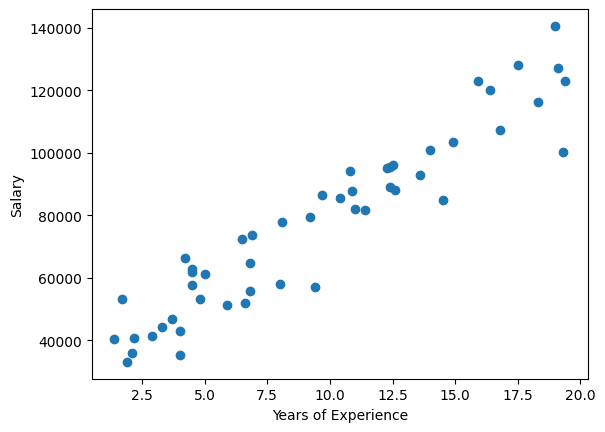

In [303]:
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(data['YearsExperience'],data['Salary'])

Compute basic statistics for each column (mean, median, variance, etc.)

In [304]:
stats=data.describe()
stats.loc['Variance']=data.var()
stats.loc['Median']=data.median()
print(stats)

          YearsExperience        Salary
count           50.000000  5.000000e+01
mean             9.480000  7.737055e+04
std              5.485491  2.829892e+04
min              1.400000  3.304880e+04
25%              4.500000  5.386188e+04
50%              9.300000  7.859865e+04
75%             13.350000  9.535622e+04
max             19.400000  1.406464e+05
Variance        30.090612  8.008291e+08
Median           9.300000  7.859865e+04


Split the data into training and testing sets (e.g., 80% for training, 20% for testing)

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=data[['YearsExperience']]
y=data['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [306]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Slope: ", lr.coef_[0])
print("Intercept: ", lr.intercept_)

Slope:  4854.184972065953
Intercept:  31387.443404060636


Use the model to make predictions on the testing set

In [307]:
y_pred = lr.predict(x_test)

Calculate evaluation metrics:
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)

In [308]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

MAE:  6836.210895894568
MSE:  79580620.27310547


Plot the regression line over the scatter plot of the data

Text(0, 0.5, 'Salary')

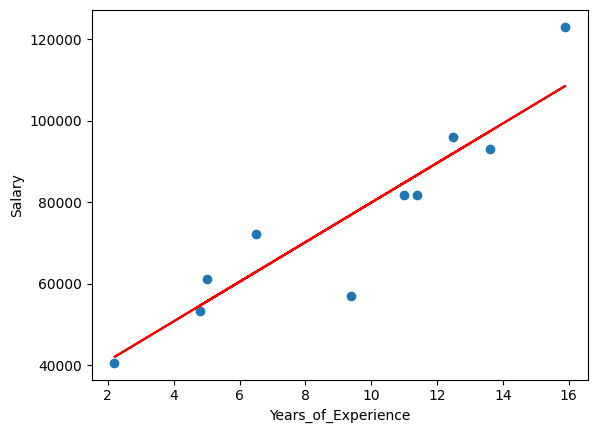

In [309]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')